Parts a,b
	Time of flight of ball 1 is  3.198629444326416  seconds
	Time of flight of ball 2 is  3.223739432421788  seconds


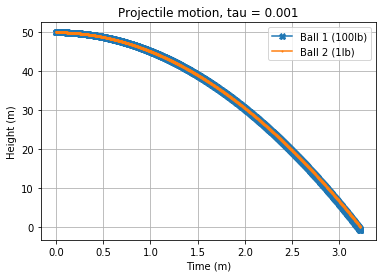

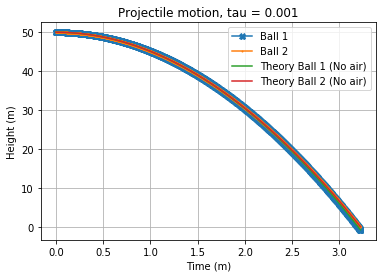


	Ball Seperation (inches) with Cd = .5: 30.88309014395907

Part c
	Ball Seperation (inches) with Cd = .035: 2.1598618666641887


In [1]:
# python 3 version
import matplotlib.pyplot as plt
import numpy as np

from exD import interpf_mod # Import modified interpolation function from last homework

# balle - Program to compute the trajectory of a baseball
#         using the Euler method.
# Edited for problem #6 to calculate the trajectory for two objects
# The cleaner way to code this would have been using an array to store data for n balls, 
# but this was quicker to code since I had already vectorized the 1-ball problem a bit differently than the origonal code


def balle(theta = [45.0,45.0],tau = .001, Cd = .5, get_input = False, calc_error = False, 
          plot_trajectory = True, midpoint = True, 
          airFlag = True, verbose = False, plot_theory = False):
    
    
    # Get input values from input prompts
    if get_input:
    #* Set initial position and velocity of the baseball  
        y1 = float(input("Enter initial height (meters): "))
        speed = float(input("Enter initial speed (m/s): "))
        theta = float(input("Enter initial angle (degrees): "))
        airFlag = bool(input("Air resistance? (Yes:1, No:0):"))
        tau = float(input("Enter timestep, tau (sec): "));  # (sec)
    else:
        # Set default initial conditions for experimenting with tau
        y1 = [50.0, 50.0]
        speed = [0.0,0]
        theta = [0,0]

        
        
    ri1 = np.array([0.0, y1[0]]);     # Initial vector position    
    vi1 = np.array([[speed[0]*np.cos(theta[0]*np.pi/180)], [speed[0]*np.sin(theta[0]*np.pi/180)]])  # Initial velocity
    ri2 = np.array([0.0, y1[1]]);     # Initial vector position    
    vi2 = np.array([[speed[1]*np.cos(theta[1]*np.pi/180)], [speed[1]*np.sin(theta[1]*np.pi/180)]]) 
    
    r1 = np.copy(ri1)
    v1 = np.copy(vi1) 
    r2 = np.copy(ri2)
    v2 = np.copy(vi2)# Set initial position and velocity, best to copy to avoid overwrites
    
    #* Set physical parameters (mass, Cd, etc.)
    mass = np.array([100/2.2,1/2.2])   # Mass of projectile (kg)
    #Cd   = 0.5    # Drag coefficient (dimensionless)
    density = 7.8e3 # Density of iron (kg/m^3)
    area = np.pi**(1/3)*((3/4)*(mass/density))**(2/3)  # Cross-sectional area of projectile (m^2)
    grav = 9.81    # Gravitational acceleration (m/s^2)
    #print(mass,area)
    time_idx1 = -1 # When the balls hit out of order, these record the index of the time in which the first ball hits
    time_idx2 = -1
    
    if not airFlag:
        rho = 0      # No air resistance
    else: 
        rho = 1.2    # Density of air (kg/m^3)
    
    air_const = -0.5*Cd*rho*area/mass  # Air resistance constant
    
    #* Loop until ball hits ground or max steps completed
    maxstep = 100000   # Maximum number of steps
    for istep in range(0,maxstep):
        #* Record position (computed and theoretical) for plotting
        t = (istep)*tau     # Current time
        if(istep ==0):
            time = [t]
            
            xplot1 = [r1[0]]   # Record trajectory for ball1
            yplot1 = [r1[1]]
            xNoAir1 = [r1[0]]
            yNoAir1 = [r1[1]]
            velocity1 = np.array(v1)
            
            xplot2 = [r2[0]]   # Record trajectory for ball2
            yplot2 = [r2[1]]
            xNoAir2 = [r2[0]]
            yNoAir2 = [r2[1]]
            velocity2 = np.array(v2)
        else:
            xplot1.append(r1[0,0])   # Record trajectory for ball1
            yplot1.append(r1[0,1])
            xNoAir1.append(ri1[0] + vi1[0]*t)   # Record trajectory for ball1
            yNoAir1.append(ri1[1] + vi1[1]*t - 0.5*grav*t**2)  
            
            xplot2.append(r2[0,0])   # Record trajectory for ball2
            yplot2.append(r2[0,1])
            xNoAir2.append(ri2[0] + vi2[0]*t)   # Record trajectory for ball2
            yNoAir2.append(ri2[1] + vi2[1]*t - 0.5*grav*t**2)  
             
        #* Calculate the acceleration of the ball 
        accel1 = air_const[0]*np.linalg.norm(v1)*v1   # Air resistance ball 1
        accel1[1] = accel1[1]-grav      # Gravity ball 1
       
        accel2 = air_const[1]*np.linalg.norm(v2)*v2   # Air resistance ball 2
        accel2[1] = accel2[1]-grav      # Gravity ball 2
        
    
        #* Calculate the new position and velocity using Euler method
        if not midpoint:
            r1 = r1 + (tau)*(v1.T)                 # Euler step ball 1
            v1 = v1 + tau*accel1
        else:
            v_new1 = v1 + tau*accel1 # Midpoint method ball 1
            r1 = r1 + (tau/2)*(v1+v_new1).T 
            v1 = v_new1 
            
            v_new2 = v2 + tau*accel2 # Midpoint method ball 1
            r2 = r2 + (tau/2)*(v2+v_new2).T 
            v2 = v_new2 
            
        time.append(t)
        velocity1 = np.concatenate((velocity1,v1),axis=1) # Store velocity ball 1
        velocity2 = np.concatenate((velocity2,v2),axis=1) # Store velocity ball 2

        #* If both balls reach ground (y<0), break out of the loop
        #* if just one reaches the ground record the time index when it hits the ground
        if r1[0,1] < 0 and r2[0,1] < 0:  
            xplot1 = np.append(xplot1,r1[0,0])   # Record trajectory for plot (ball1)
            yplot1 = np.append(yplot1,r1[0,1])
            
            xplot2 = np.append(xplot2,r2[0,0])   # Record trajectory for plot (ball2)
            yplot2 = np.append(yplot2,r2[0,1])

            time = np.array(time)
            break
        elif r1[0,1] < 0 and time_idx1 == -1:
            time_idx1 = len(time)-1
            #print('b1',time_idx1)
        elif r2[0,1] < 0 and time_idx2 == -1:
            time_idx2 = len(time)-1
            #print(yplot1[-1])
    
    # Intialize seperation, it will get rewritten unless the balls land together
    seperation = 0
    
    # Once the ball reaches the ground, interpolate the last 3 points to find accurate endpoints
    # Need better timekeeping indexing for 2 balls
    if time_idx1 >= 0:
        # Interpolation for ball 1 if it lands first
        x_end1 = interpf_mod(0,yplot1[time_idx1-2:time_idx1+1],xplot1[time_idx1-2:time_idx1+1]) # Note use interpf
        t_end1 = interpf_mod(0,yplot1[time_idx1-2:time_idx1+1],time[time_idx1-2:time_idx1+1])
        seperation = interpf_mod(0,yplot2[time_idx1-2:time_idx1+1],yplot1[time_idx1-2:time_idx1+1])
    else:
        # Interpolation for ball 1 if it lands last or with ball 2
        x_end1 = interpf_mod(0,yplot1[-3:],xplot1[-3:])
        t_end1 = interpf_mod(0,yplot1[-3:],time[-3:])    
    
    if time_idx2 >= 0:
        # Interpolation for ball 2 if it lands first
        x_end2 = interpf_mod(0,yplot2[time_idx2-2:time_idx2+1],xplot2[time_idx2-2:time_idx2+1]) # Note use interpf
        t_end2 = interpf_mod(0,yplot2[time_idx2-2:time_idx2+1],time[time_idx2-2:time_idx2+1])    
        seperation = interpf_mod(0,yplot2[time_idx1-2:time_idx1+1],yplot1[time_idx1-2:time_idx1+1])
    else:
        # Interpolation for ball 2 if it lands last or with ball 1
        x_end2 = interpf_mod(0,yplot2[-3:],xplot2[-3:]) # Note use interpf
        t_end2 = interpf_mod(0,yplot2[-3:],time[-3:])
        
    
    if verbose:
        # Print maximum range and time of flight
        print('\tTime of flight of ball 1 is ',t_end1,' seconds')
        print('\tTime of flight of ball 2 is ',t_end2,' seconds')
      
    if plot_trajectory:
        # Graph the trajectory of both balls
        plt.figure(0)
        
        # Plot the computed trajectory and parabolic, no-air curve
        
        # ball 1
        plt.plot(time,yplot1,'-X')
        # Ball 2
        plt.plot(time,yplot2,'-o',markersize=1)

        if plot_theory:
            # Part b
            lin_t = np.linspace(0,max(time),10000)
            b1 = Cd*rho*area[0]/(2*mass[0])
            b2 = Cd*rho*area[1]/(2*mass[1])
            exact1 = y1[0] - (1/b1)*np.log(np.cosh(np.sqrt(b1*grav)*lin_t))
            exact2 = y1[1] - (1/b2)*np.log(np.cosh(np.sqrt(b2*grav)*lin_t))
            if verbose:
                print("\n\tExact time ball1:",interpf_mod(0,exact1[-5:],lin_t[-5:]))
                print("\tExact time ball2:",interpf_mod(0,exact2[-5:],lin_t[-5:]))

            plt.plot(lin_t,exact1)
            plt.plot(lin_t,exact2)            
            plt.legend(['Ball 1', 'Ball 2','Theory Ball 1 (No air)','Theory Ball 2 (No air)'])
        else:
            plt.legend(['Ball 1 (100lb)', 'Ball 2 (1lb)']);

        plt.xlabel('Time (m)');  plt.ylabel('Height (m)');
        plt.title('Projectile motion, tau = %s' % tau);

        plt.grid(True)
        plt.show()
    
    
    return (xplot1,yplot1,x_end1,t_end1,time_idx1),(xplot2,yplot2,x_end2,t_end2,time_idx2),seperation
    
    
if __name__ == '__main__':
    # Part a,b
    print("Parts a,b")
    b1,b2,sep = balle(plot_trajectory = True, midpoint = True, airFlag = True, verbose = True, plot_theory=False)
    b1,b2,sep = balle(plot_trajectory = True, midpoint = True, airFlag = True, verbose = False, plot_theory=True)
    print("\n\tBall Seperation (inches) with Cd = .5:", abs(sep)*39.3701)
    # Part c
    print("\nPart c")
    b1,b2,sep = balle(Cd = .035, plot_trajectory = False, midpoint = True, airFlag = True, verbose = False, plot_theory=False)
    print("\tBall Seperation (inches) with Cd = .035:", abs(sep)*39.3701)